## Importing laibs

In [1]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt 
import seaborn as sb 
%matplotlib inline

import warnings

# Ignore warnings
warnings.filterwarnings("ignore")

## Raw Data 

In [2]:
df_raw = pd.read_excel("Data Hackathon Exercise - Sample Data Set.xlsx")

In [3]:
df_raw

,Unnamed: 0,Upsell,Increasing instalment,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61
0,NaN,Upgrade,Increasing term,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Sales, by month",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,Month,2019-01-31 00:00:00,2019-02-28 00:00:00,2019-03-31 00:00:00,2019-04-30 00:00:00,2019-05-31 00:00:00,2019-06-30 00:00:00,2019-07-31 00:00:00,2019-08-31 00:00:00,...,2023-03-31 00:00:00,2023-04-30 00:00:00,2023-05-31 00:00:00,2023-06-30 00:00:00,2023-07-31 00:00:00,2023-08-31 00:00:00,2023-09-30 00:00:00,2023-10-31 00:00:00,2023-11-30 00:00:00,2023-12-31 00:00:00
5,NaN,Volume (units),10000,10200,10404,10612,10824,11041,11262,11487,...,26916,27454,28003,28563,29135,29717,30312,30918,31536,32167


**will be difficult working with this data in the foramt**

## Comming up with an Ideal data set

In [4]:
data = {
    'Month': ["1/31/19", "2/28/19", "3/31/19", "4/30/19", "5/31/19", "6/30/19", "7/31/19", "8/31/19", "9/30/19", "10/31/19", "11/30/19", "12/31/19", "1/31/20", "2/29/20", "3/31/20", "4/30/20", "5/31/20", "6/30/20", "7/31/20", "8/31/20", "9/30/20", "10/31/20", "11/30/20", "12/31/20", "1/31/21", "2/28/21", "3/31/21", "4/30/21", "5/31/21", "6/30/21", "7/31/21", "8/31/21", "9/30/21", "10/31/21", "11/30/21", "12/31/21", "1/31/22", "2/28/22", "3/31/22", "4/30/22", "5/31/22", "6/30/22", "7/31/22", "8/31/22", "9/30/22", "10/31/22", "11/30/22", "12/31/22", "1/31/23", "2/28/23", "3/31/23", "4/30/23", "5/31/23", "6/30/23", "7/31/23", "8/31/23", "9/30/23", "10/31/23", "11/30/23", "12/31/23"
],
    'Volume (units)': [10000, 10200, 10404, 10612, 10824, 11041, 11262, 11487, 11717, 11951, 12190, 12434, 12682, 12936, 13195, 13459, 13728, 14002, 14282, 14568, 14859, 15157, 15460, 15769, 16084, 16406, 16734, 17069, 17410, 17758, 18114, 18476, 18845, 19222, 19607, 19999, 20399, 20807, 21223, 21647, 22080, 22522, 22972, 23432, 23901, 24379, 24866, 25363, 25871, 26388, 26916, 27454, 28003, 28563, 29135, 29717, 30312, 30918, 31536, 32167
]
}

In [5]:
# Create a DataFrame
df = pd.DataFrame(data)

In [6]:
df.shape

(60, 2)

In [7]:
df.head()

,Month,Volume (units)
0,1/31/19,10000
1,2/28/19,10200
2,3/31/19,10404
3,4/30/19,10612
4,5/31/19,10824


In [8]:
df["Volume (units)"].describe()

count       60.000000
mean     19008.566667
std       6498.493800
min      10000.000000
25%      13393.000000
50%      17936.000000
75%      24020.500000
max      32167.000000
Name: Volume (units), dtype: float64

In [9]:
# Convert 'Month' column to datetime type
df['Month'] = pd.to_datetime(df['Month'])

In [10]:
# Extracting day, month, and year
df['Day'] = df['Month'].dt.day
df['Month_Num'] = df['Month'].dt.month
df['Year'] = df['Month'].dt.year

In [11]:
# Monthly volume sales
monthly_sales = df.groupby(df['Month'].dt.to_period('M'))['Volume (units)'].sum()

# Daily volume sales
daily_sales = df.groupby(['Month', 'Day'])['Volume (units)'].sum()

# Yearly volume sales
yearly_sales = df.groupby(df['Year'])['Volume (units)'].sum()

# Print results
print("Monthly volume sales:\n", monthly_sales.T)

Monthly volume sales:
 Month
2019-01    10000
2019-02    10200
2019-03    10404
2019-04    10612
2019-05    10824
2019-06    11041
2019-07    11262
2019-08    11487
2019-09    11717
2019-10    11951
2019-11    12190
2019-12    12434
2020-01    12682
2020-02    12936
2020-03    13195
2020-04    13459
2020-05    13728
2020-06    14002
2020-07    14282
2020-08    14568
2020-09    14859
2020-10    15157
2020-11    15460
2020-12    15769
2021-01    16084
2021-02    16406
2021-03    16734
2021-04    17069
2021-05    17410
2021-06    17758
2021-07    18114
2021-08    18476
2021-09    18845
2021-10    19222
2021-11    19607
2021-12    19999
2022-01    20399
2022-02    20807
2022-03    21223
2022-04    21647
2022-05    22080
2022-06    22522
2022-07    22972
2022-08    23432
2022-09    23901
2022-10    24379
2022-11    24866
2022-12    25363
2023-01    25871
2023-02    26388
2023-03    26916
2023-04    27454
2023-05    28003
2023-06    28563
2023-07    29135
2023-08    29717
2023-09    30312
20

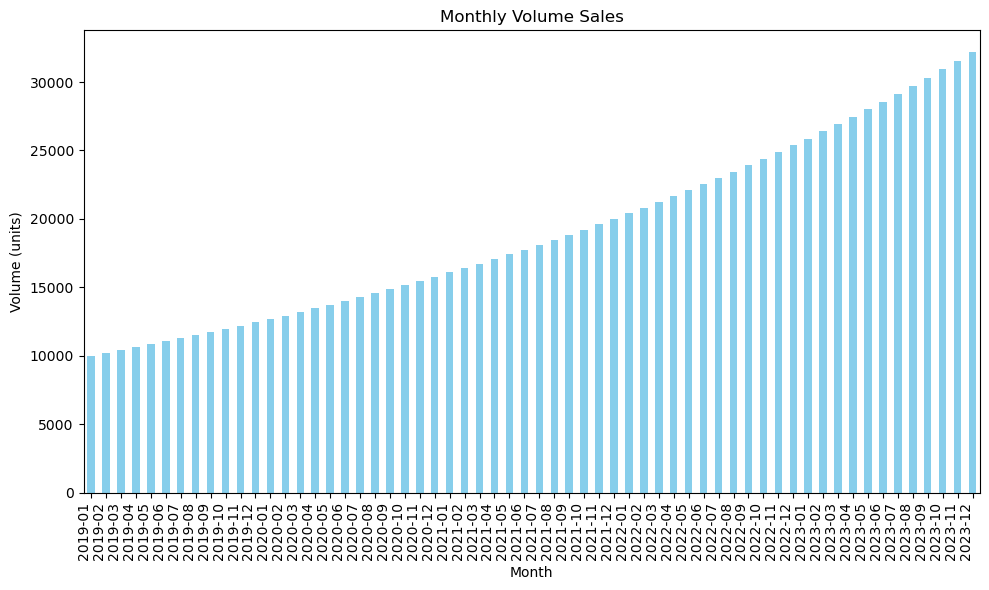

In [12]:
# Plot monthly volume sales
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='bar', color='skyblue')
plt.title('Monthly Volume Sales')
plt.xlabel('Month')
plt.ylabel('Volume (units)')
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels and align to the right
plt.tight_layout()
plt.show()

**Upward trend** 

In [13]:
print("\nDaily volume sales:\n", daily_sales)


Daily volume sales:
 Month       Day
2019-01-31  31     10000
2019-02-28  28     10200
2019-03-31  31     10404
2019-04-30  30     10612
2019-05-31  31     10824
2019-06-30  30     11041
2019-07-31  31     11262
2019-08-31  31     11487
2019-09-30  30     11717
2019-10-31  31     11951
2019-11-30  30     12190
2019-12-31  31     12434
2020-01-31  31     12682
2020-02-29  29     12936
2020-03-31  31     13195
2020-04-30  30     13459
2020-05-31  31     13728
2020-06-30  30     14002
2020-07-31  31     14282
2020-08-31  31     14568
2020-09-30  30     14859
2020-10-31  31     15157
2020-11-30  30     15460
2020-12-31  31     15769
2021-01-31  31     16084
2021-02-28  28     16406
2021-03-31  31     16734
2021-04-30  30     17069
2021-05-31  31     17410
2021-06-30  30     17758
2021-07-31  31     18114
2021-08-31  31     18476
2021-09-30  30     18845
2021-10-31  31     19222
2021-11-30  30     19607
2021-12-31  31     19999
2022-01-31  31     20399
2022-02-28  28     20807
2022-03-31  

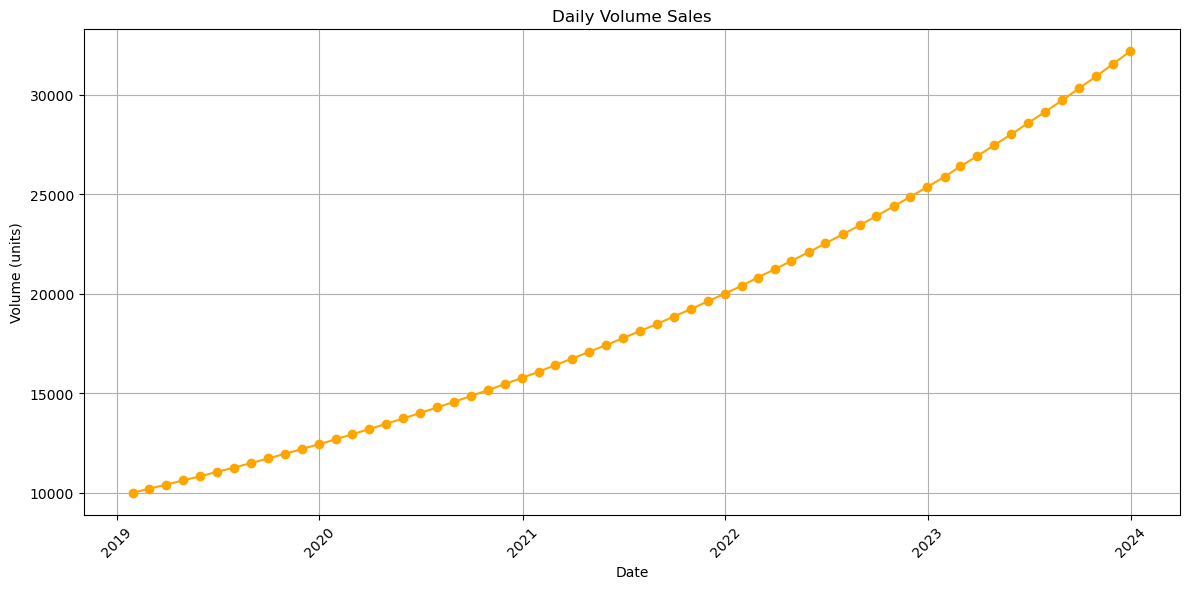

In [14]:
# Convert daily_sales to DataFrame for easier plotting
daily_sales_df = daily_sales.reset_index()

# Plot daily volume sales
plt.figure(figsize=(12, 6))
plt.plot(daily_sales_df['Month'], daily_sales_df['Volume (units)'], marker='o', color='orange')
plt.title('Daily Volume Sales')
plt.xlabel('Date')
plt.ylabel('Volume (units)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

**Nice Upward trend**

In [15]:
print("\nYearly volume sales:\n", yearly_sales)


Yearly volume sales:
 Year
2019    134122
2020    170097
2021    215724
2022    273591
2023    346980
Name: Volume (units), dtype: int64


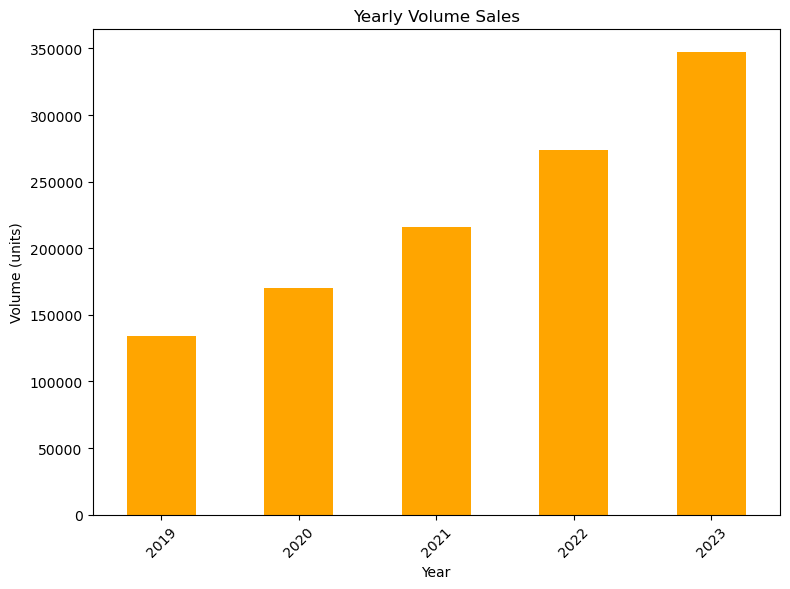

In [16]:
# Plot yearly volume sales
plt.figure(figsize=(8, 6))
yearly_sales.plot(kind='bar', color='orange')
plt.title('Yearly Volume Sales')
plt.xlabel('Year')
plt.ylabel('Volume (units)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**There is an uprize in Volume (Units) as the years go by**

In [17]:
df.head()

,Month,Volume (units),Day,Month_Num,Year
0,2019-01-31,10000,31,1,2019
1,2019-02-28,10200,28,2,2019
2,2019-03-31,10404,31,3,2019
3,2019-04-30,10612,30,4,2019
4,2019-05-31,10824,31,5,2019


In [18]:
df.isnull().sum()

Month             0
Volume (units)    0
Day               0
Month_Num         0
Year              0
dtype: int64

## Loan Eligibility:

In [19]:
# Calculate loan eligibility
df['CashLoanEligible'] = 1  # Assuming all customers are initially eligible
df['TVUpgradeEligible'] = 1  # Assuming all customers are initially eligible for TV upgrades

**We'll assume all customers are initially eligible for both cash loans and TV upgrades.**

## Purchase Probability:

In [20]:
# Calculate purchase probability
df['CashLoanPurchaseProb'] = 0.9  # 90% purchase probability for eligible customers
df['TVUpgradePurchaseProb'] = 0.5  # 50% purchase probability for eligible customers

**We'll assign purchase probabilities based on the provided assumptions (90% for cash loans and 50% for TV upgrades).**

## Loan Duration:

In [21]:
# Calculate loan duration
df['CashLoanDuration'] = 400  # Days from purchase to finished payment for eligible loans
df['TVUpgradeDuration'] = 0  # TV upgrades must be purchased the day the Classic loan is finished

**We'll set the duration of cash loans to 400 days and TV upgrades to 0 days (indicating they must be purchased the day the Classic loan is finished).**

## Profit per Loan:

In [22]:
# Calculate profit per loan
df['ProfitPerCashLoan'] = 25  # Profit margin for cash loans
df['ProfitPerTVUpgrade'] = 150  # Profit margin for TV upgrades

**We'll set the profit per cash loan to $25 and per TV upgrade to $150.**

## Discount Rate:

In [23]:
# Apply discount rate
discount_rate = 0.15
df['ProfitPerCashLoanDiscounted'] = df['ProfitPerCashLoan'] / ((1 + discount_rate) ** (df['CashLoanDuration'] / 365))
df['ProfitPerTVUpgradeDiscounted'] = df['ProfitPerTVUpgrade'] / ((1 + discount_rate) ** (df['TVUpgradeDuration'] / 365))

**We'll apply an annual discount rate of 15%.**

In [24]:
df.head() 

,Month,Volume (units),Day,Month_Num,Year,CashLoanEligible,TVUpgradeEligible,CashLoanPurchaseProb,TVUpgradePurchaseProb,CashLoanDuration,TVUpgradeDuration,ProfitPerCashLoan,ProfitPerTVUpgrade,ProfitPerCashLoanDiscounted,ProfitPerTVUpgradeDiscounted
0,2019-01-31,10000,31,1,2019,1,1,0.9,0.5,400,0,25,150,21.44973,150.0
1,2019-02-28,10200,28,2,2019,1,1,0.9,0.5,400,0,25,150,21.44973,150.0
2,2019-03-31,10404,31,3,2019,1,1,0.9,0.5,400,0,25,150,21.44973,150.0
3,2019-04-30,10612,30,4,2019,1,1,0.9,0.5,400,0,25,150,21.44973,150.0
4,2019-05-31,10824,31,5,2019,1,1,0.9,0.5,400,0,25,150,21.44973,150.0


In [25]:
cash_loan_duration = 400  # Duration of cash loans (days)
tv_upgrade_duration = 0  # Duration of TV upgrades (days)
profit_per_cash_loan = 25  # Profit margin for cash loans
profit_per_tv_upgrade = 150  # Profit margin for TV upgrades

In [26]:
# Filter data for 2023
df_2023 = df[df['Year'] == 2023]

In [27]:
# Calculate number of cash loans and TV upgrades sold by month in 2023
num_cash_loans = (df_2023['CashLoanEligible'] * df_2023['CashLoanPurchaseProb']).sum()
num_tv_upgrades = (df_2023['TVUpgradeEligible'] * df_2023['TVUpgradePurchaseProb']).sum()

In [28]:
# Calculate profit under the optimal product mix
profit_cash_loans = num_cash_loans * profit_per_cash_loan / ((1 + discount_rate) ** (cash_loan_duration / 365))
profit_tv_upgrades = num_tv_upgrades * profit_per_tv_upgrade / ((1 + discount_rate) ** (tv_upgrade_duration / 365))
total_profit = profit_cash_loans + profit_tv_upgrades

In [29]:
# Print results
print("1) Number of cash loans sold in 2023:", int(num_cash_loans))
print("   Number of TV upgrades sold in 2023:", int(num_tv_upgrades))
print("2) Profit under the optimal product mix in 2023: $", round(total_profit, 2))

1) Number of cash loans sold in 2023: 10
   Number of TV upgrades sold in 2023: 6
2) Profit under the optimal product mix in 2023: $ 1131.66


## 3) Potential Adjustments to Business Rules to Improve Profitability:

- **Adjust Eligibility Criteria**: Evaluate and adjust the eligibility criteria for cash loans and TV upgrades based on customer behavior, demographics, or other relevant factors. For example, you could refine the threshold for eligibility based on the volume of units sold.

- **Modify Purchase Probabilities**: Experiment with different purchase probabilities for cash loans and TV upgrades to optimize sales. You could conduct A/B testing or use predictive modeling to determine the most effective purchase probabilities.

- **Optimize Loan Durations**: Review and adjust the duration of cash loans and TV upgrades to maximize profitability. Consider factors such as customer repayment behavior and market trends to determine the optimal loan durations.

- **Explore Pricing Strategies**: Evaluate pricing strategies for cash loans and TV upgrades to enhance profitability. This could involve adjusting profit margins, offering discounts or incentives, or implementing dynamic pricing based on demand.


## 4) Operational Improvements to Investigate to Improve Profitability:

- **Customer Segmentation**: Analyze customer segments to identify high-value customers with a higher propensity to purchase cash loans or TV upgrades. Tailor marketing strategies and product offerings to target these segments effectively.

- **Enhance Sales Processes**: Streamline and optimize sales processes to improve conversion rates and reduce acquisition costs. This could involve implementing automation, improving customer engagement strategies, or enhancing the user experience.

- **Risk Management**: Implement robust risk management practices to mitigate default risks associated with cash loans. Develop credit scoring models or risk assessment frameworks to identify and manage credit risks effectively.

- **Data Analysis and Insights**: Leverage advanced analytics and data-driven insights to gain a deeper understanding of customer behavior, market dynamics, and competitive landscape. Use predictive modeling and forecasting techniques to anticipate trends and make informed business decisions.
